In [1]:
import sys
sys.path.append('/workspace/user_data')

In [2]:
import modelscripts
import planetengine
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
system = modelscripts.isovisc_systemscript.build(Ra = 1e4, aspect = 2., res = 16)
initial = {
    'temperatureField': planetengine.initials.sinusoidal.IC(freq = 11)
    }
planetengine.initials.apply(initial, system)

In [4]:
# planetengine.quickShow(system.temperatureField, colourBar = False, edgecolour = 'black', facecolour = 'black')

In [5]:
myfig = planetengine.visualisation.QuickFig(system.temperatureField, colourBar = False, edgecolour = 'black', facecolour = 'black')

Fitted 1 variables to the figure.



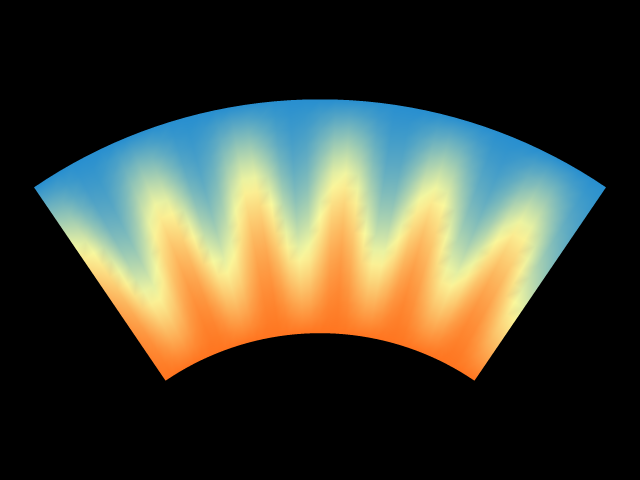

In [6]:
myfig.show()

In [7]:
myfig.save('testfig/testfig')

In [ ]:
import numpy as np

In [ ]:
def domFreqFunc(system):
    Nus = system.temperatureField.fn_gradient[1].evaluate(system.outer)
    Nus = (Nus - np.average(Nus)) / np.average(Nus)
    sp = np.abs(np.fft.rfft(Nus, axis = 0))
    freq = np.fft.rfftfreq(Nus.size, 1. / (2. * sp.size))
    domFreq = max(zip(sp[:,0], freq))[1]
    return domFreq

In [ ]:
domFreqFunc(system)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def NusProfile(system):
    Nus = system.temperatureField.fn_gradient[1].evaluate(system.outer)
    Nus = (Nus - np.average(Nus)) / np.average(Nus)
    plt.plot(Nus)
    plt.show()

In [ ]:
NusProfile(system)

In [ ]:
fig, axs = plt.subplots(8, 7)